# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 2: Data Inspection, Cleaning and Wrangling in Python

Mark Bauer

Table of Contents
=================

   Getting Started
          
   1. Importing Libraries 
   2. Reading in Data as a pandas Dataframe      
   3. Data Inspection
       * 3.1 Previewing Data
       * 3.2 Calculating Summary Statistics
       * 3.3 Identifying Null Values 
   4. Data Cleaning & Wrangling
       * 4.1 Previewing Column Values
       * 4.2 Exploring Distribution of Values
       * 4.3 Filtering Data
       * 4.4 Create New Columns
       * 4.5 Filling In or Dropping Null Values 
   5. Sample Analysis
       * 5.1. Line Plot of Year Built
       * 5.2. Identify Oldest Building in Dataset  
   6. Conclusion

**Goal:** In this notebook, we will review various ways to to inspect, clean, wrangle, and detect outliers in your data.

**Main Library:** [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Getting Started: Accessing the Building Footprints Dataset
## Reading in data as CSV in static form

Screenshot of link address.
![building_footprints_csv](images/building-footprints-csv.png)

### Dataset Web Page Link: 
https://data.cityofnewyork.us/Housing-Development/Building-Footprints/nqwf-w8eh

### Documentation/Metadata: 
https://github.com/CityOfNewYork/nyc-geo-metadata/blob/master/Metadata/Metadata_BuildingFootprints.md

### Attribute Information:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| BASE_BBL | Borough, block, and lot number for the tax lot that the footprint is physically located within. | text | No
| MPLUTO_BBL | Borough, block, and lot number to be used for joining the building footprints data to DCP's MapPLUTO data, which aggregates data for condominium buildings using DOF's billing BBL. For non-condominium buildings the billing BBL is the same as the BASE_BBL. For condominium buildings the billing BBL may be the same for multiple buildings on different physical tax lots if they are part of the same billing unit for DOF purposes. | text | No
| BIN | Building Identification Number. A number assigned by City Planning and used by Dept. of Buildings to reference information pertaining to an individual building. The first digit is a borough code (1 = Manhattan, 2 = The Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island). The remaining 6 digits are unique for buildings within that borough. In some cases where these 6 digits are all zeros (e.g. 1000000, 2000000, etc.) the BIN is unassigned or unknown. | double | No
| NAME | Building name (limited to commonly known names). This field has not been actively maintained since the original creation of this dataset. | text | No
| LSTMODDATE | Feature last modified date | date | No
| LSTSTATTYPE | Feature last status type (Demolition, Alteration, Geometry, Initialization, Correction, Marked for Construction, Marked For Demolition, Constructed) | text | No
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No
| DOITT_ID | Unique identifier assigned by DOITT.  | double | No
| HEIGHTROOF | Building Height is calculated as the difference from the building elevation from the Elevation point feature class and the elevation in the interpolated TIN model. This is the height of the roof above the ground elevation, NOT its height above sea level. Records where this is zero or NULL mean that this information was not available. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot. The building height information is updated through our planimetric updates every 4 years. In between those 4-year update cycles, DoITT manually updates building height information from a variety of sources -- (1) Final as-built heights as shown in plan drawings posted on Department of Buildings BIS website (2) EagleView Oblique imagery, direct measurements taken on photogrammetrically controlled aerial imagery (3) Cyclomedia imagery, direct measurements were taken on photogrammetrically controlled terrestrial imagery (for buildings less than 60’ tall, only)
| FEAT_CODE | Type of Building. List of values:<br>2100 = Building<br>5100 = Building Under Construction<br>5110 = Garage<br>2110 = Skybridge<br>1001 = Gas Station Canopy<br>1002 = Storage Tank<br>1003 = Placeholder (triangle for permitted bldg)<br>1004 = Auxiliary Structure (non-addressable, not garage)<br>1005 = Temporary Structure (e.g. construction trailer) | long | No
| GROUNDELEV | Lowest Elevation at the building ground level. Calculated from LiDAR or photogrammetrically. | double | No | The units of measurement are based on the coordinate reference system used, which for all Planimetrics is New York State Plane Coordinates, Long Island East Zone, NAD83, US foot. All measurements in the attribute tables are in US foot.
| GEOM_SOURCE | Indicates the reference source used to add or update the feature. Photogrammetric means the feature was added or updated using photogrammetric stereo-compilation methodology. This is the most accurate update method and should conform to the ASPRS accuracy standards. Other (Manual) means the feature was added or updated by heads-up digitizing from orthophotos or approximated from a plan drawing. These features will be generally be less accurate and may not conform to the ASPRS accuracy standards. | text | No

# 1. Importing Libraries

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# to plot matplotlib figures inline on the notebook
%matplotlib inline

In [4]:
# printing verions of Python modules and packages with **watermark** 
# documention for installing watermark: https://github.com/rasbt/watermark

%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

numpy     : 1.26.4
pandas    : 2.2.1
matplotlib: 3.8.3
seaborn   : 0.13.2



# 2. Reading in Data as a pandas Dataframe
If you receive `HTTPError: HTTP Error 404: Not Found`, you need to replace the CSV link. The path might have been updated.

In [10]:
import pandas as pd

path = '/Users/ankitrathore/Downloads/building.csv'
building_df = pd.read_csv(path)

# preview the data
print(building_df.head())


                                            the_geom NAME      BIN  \
0  MULTIPOLYGON (((-73.96664570466969 40.62599676...  NaN  3170958   
1  MULTIPOLYGON (((-74.16790202462265 40.63936048...  NaN  5028452   
2  MULTIPOLYGON (((-74.19510813278613 40.55610681...  NaN  5078368   
3  MULTIPOLYGON (((-73.96113466505085 40.57743931...  NaN  3245111   
4  MULTIPOLYGON (((-73.75421559146166 40.75591276...  NaN  4161096   

   CNSTRCT_YR              LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0      1925.0  08/22/2017 12:00:00 AM  Constructed     96807   29.749853   
1      1965.0  08/22/2017 12:00:00 AM  Constructed    326368   22.630000   
2      1970.0  08/22/2017 12:00:00 AM  Constructed    746627   35.760000   
3      1928.0  08/22/2017 12:00:00 AM  Constructed    786626   37.500000   
4      1950.0  08/22/2017 12:00:00 AM  Constructed    746409   18.015113   

   FEAT_CODE  GROUNDELEV  SHAPE_AREA  SHAPE_LEN    BASE_BBL  MPLUTO_BBL  \
0       2100        40.0           0          0

In [16]:
len(building_df)

1083577

# 3. Data Inspection
## 3.1 Previewing Data

In [17]:
# previewing the first five rows
building_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [18]:
# previewing the last five rows
building_df.tail()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1083572,MULTIPOLYGON (((-74.08706292133714 40.62914195...,NaN,5157675,2020.0,03/29/2024 12:00:00 AM,Constructed,1301770,10.0,5110,274.0,0,0,5005870150,5005870150,Other (Man,{286A461E-938E-4D3D-BE23-CEB1146F7404}
1083573,MULTIPOLYGON (((-74.14445666373078 40.53864725...,NaN,5171559,2022.0,03/29/2024 12:00:00 AM,Constructed,1301771,26.0,2100,7.0,0,0,5053060070,5053060070,Other (Man,{ED9670B0-F4A3-4DFB-B0F5-D437D7DC2603}
1083574,MULTIPOLYGON (((-74.1447187312683 40.538494680...,NaN,5174467,2023.0,03/29/2024 12:00:00 AM,NaN,1301772,10.0,5110,6.0,0,0,5053060070,5053060070,Other (Man,{12525865-8136-4FD2-99E7-ABA36140B68F}
1083575,MULTIPOLYGON (((-74.14473245567532 40.53852591...,NaN,5172172,2021.0,03/29/2024 12:00:00 AM,Constructed,1301773,10.0,5110,6.0,0,0,5053060069,5053060069,Other (Man,{5C20F608-FEAF-449B-BC1C-FCA76C8732C1}
1083576,MULTIPOLYGON (((-73.81171238527081 40.79711449...,NaN,4619466,2022.0,03/29/2024 12:00:00 AM,Constructed,1301775,15.0,2100,13.0,0,0,4044870155,4044870155,Other (Man,{24134054-29F4-43FF-8F11-88D00C5691D7}


In [19]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_df.shape

(1083577, 16)

In [20]:
# more readable
rows, columns = building_df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

This dataset has 1,083,577 rows and 16 columns.


In [21]:
# the object's type
type(building_df)

pandas.core.frame.DataFrame

In [22]:
# printing the object's type of a column
type(building_df['CNSTRCT_YR'])

pandas.core.series.Series

In [23]:
# notice the difference of type from series to dataframe
print(type(building_df["CNSTRCT_YR"]))
print(type(building_df[["CNSTRCT_YR"]]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
# printing the columns
building_df.columns

Index(['the_geom', 'NAME', 'BIN', 'CNSTRCT_YR', 'LSTMODDATE', 'LSTSTATYPE',
       'DOITT_ID', 'HEIGHTROOF', 'FEAT_CODE', 'GROUNDELEV', 'SHAPE_AREA',
       'SHAPE_LEN', 'BASE_BBL', 'MPLUTO_BBL', 'GEOMSOURCE', 'GLOBALID'],
      dtype='object')

In [25]:
# printing the data types of our columns
building_df.dtypes

the_geom       object
NAME           object
BIN             int64
CNSTRCT_YR    float64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE       int64
GROUNDELEV    float64
SHAPE_AREA      int64
SHAPE_LEN       int64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
GLOBALID       object
dtype: object

In [26]:
# printing the names, non-null counts and datatypes of columns
building_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083577 entries, 0 to 1083576
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083577 non-null  object 
 1   NAME        2254 non-null     object 
 2   BIN         1083577 non-null  int64  
 3   CNSTRCT_YR  1073207 non-null  float64
 4   LSTMODDATE  1083577 non-null  object 
 5   LSTSTATYPE  1083258 non-null  object 
 6   DOITT_ID    1083577 non-null  int64  
 7   HEIGHTROOF  1080928 non-null  float64
 8   FEAT_CODE   1083577 non-null  int64  
 9   GROUNDELEV  1083013 non-null  float64
 10  SHAPE_AREA  1083577 non-null  int64  
 11  SHAPE_LEN   1083577 non-null  int64  
 12  BASE_BBL    1083577 non-null  int64  
 13  MPLUTO_BBL  1083577 non-null  int64  
 14  GEOMSOURCE  1083261 non-null  object 
 15  GLOBALID    1083577 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.3+ MB


In [27]:
# printing RangeIndex
building_df.index

RangeIndex(start=0, stop=1083577, step=1)

In [28]:
# printing True/False if column is unique on our unique key (DOITT_ID)
building_df['DOITT_ID'].is_unique

True

## 3.2 Calculating Summary Statistics

In [29]:
# printing descriptive statistics of our numeric columns
building_df.describe()

,BIN,CNSTRCT_YR,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL
count,1.083577e+06,1.073207e+06,1.083577e+06,1.080928e+06,1.083577e+06,1.083013e+06,1083577.0,1083577.0,1.083577e+06,1.083577e+06
mean,3.712898e+06,1.939616e+03,5.948329e+05,2.769362e+01,2.693534e+03,5.512108e+01,0.0,0.0,3.564108e+09,3.564108e+09
std,1.026661e+06,2.945580e+01,3.621754e+05,2.176273e+01,1.198630e+03,4.154813e+01,0.0,0.0,9.858650e+08,9.858649e+08
min,1.000002e+06,1.652000e+03,1.000000e+00,0.000000e+00,1.000000e+03,-1.600000e+01,0.0,0.0,1.000010e+09,1.000010e+09
25%,3.129676e+06,1.920000e+03,2.880640e+05,1.851212e+01,2.100000e+03,2.500000e+01,0.0,0.0,3.043380e+09,3.043380e+09
50%,4.067861e+06,1.930000e+03,5.763270e+05,2.612000e+01,2.100000e+03,4.600000e+01,0.0,0.0,4.019530e+09,4.019530e+09
75%,4.483400e+06,1.955000e+03,8.664070e+05,3.113000e+01,2.100000e+03,7.400000e+01,0.0,0.0,4.107000e+09,4.107000e+09
max,5.799523e+06,2.024000e+03,1.301775e+06,1.550000e+03,5.110000e+03,1.335000e+03,0.0,0.0,6.000000e+09,6.000000e+09


In [75]:
# printing descriptive statistics of our non-numeric columns
building_df.describe(include=['O'])

,the_geom,NAME,LSTMODDATE,LSTSTATYPE,GEOMSOURCE,GLOBALID
count,1083577,2254,1083577,1083258,1083261,1083577
unique,1083577,1896,1773,13,3,1083577
top,MULTIPOLYGON (((-73.96664570466969 40.62599676...,Adler Place Town Houses,08/22/2017 12:00:00 AM,Constructed,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
freq,1,52,800721,1080800,1012294,1


In [76]:
# returning the mode of CNSTRCT_YR and NAME
(building_df
 .loc[:, ['CNSTRCT_YR', 'NAME']]
 .mode()
 .rename(index={0: "mode"})
)

,CNSTRCT_YR,NAME
mode,1920.0,Adler Place Town Houses


In [77]:
# value counts of the CNSTRCT_YR column - top 10
(building_df['CNSTRCT_YR']
 .value_counts()
 .head(10)
)

CNSTRCT_YR
1920.0    130156
1930.0    112530
1925.0    109033
1950.0     62647
1910.0     52249
1940.0     51224
1960.0     40739
1935.0     38530
1931.0     36703
1945.0     34033
Name: count, dtype: int64

In [78]:
# value counts of the NAME column - top 20
(building_df['NAME']
 .value_counts()
 .head(20)
)

NAME
Adler Place Town Houses                  52
Cooper Place Town Houses                 38
Broun Place Town Houses                  36
Debs Place Town Houses                   34
Defoe Place Town Houses                  26
Asch Loop Town Houses                    18
Earhart Lane Town Houses                 16
NO NAME                                   9
Restrooms                                 8
Kimball Block                             6
10                                        5
20                                        5
Educational Park                          5
Park Maintenance                          4
21                                        4
22                                        4
Thomas Greene Playground-Building         4
5                                         4
4                                         4
Lawrence C Thompson Mem Park-Building     4
Name: count, dtype: int64

In [79]:
# group by 'LSTSTATYPE', count of rows
(building_df
 .groupby(by='LSTSTATYPE')['DOITT_ID']
 .count()
)

LSTSTATYPE
Alteration                     1435
Constructed                 1080800
Correction                       65
Demolition                       11
Geometry                         17
Initialization                   99
Investigate Construction         52
Investigate Demolition            4
Marked for Construction         263
Marked for Demolition            84
Marked for construction           9
Merged                           89
Split                           330
Name: DOITT_ID, dtype: int64

In [80]:
# group by 'FEAT_CODE', mean value of 'HEIGHTROOF' and 'GROUNDELEV'
(building_df
 .groupby(by='FEAT_CODE')[['HEIGHTROOF', 'GROUNDELEV']]
 .mean()
 .rename(columns={'HEIGHTROOF':'HEIGHTROOF_avg', 'GROUNDELEV':'GROUNDELEV_avg'})
)

,HEIGHTROOF_avg,GROUNDELEV_avg
FEAT_CODE,,
1000,14.882259,39.965517
1001,18.060071,55.975000
1003,70.687500,48.480000
1004,16.954956,32.504425
1005,13.004551,30.047619
1006,384.941176,39.000000
2100,31.614431,55.100900
2110,54.010564,37.771930
5100,102.186453,50.719298


In [81]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
)

count
LSTSTATYPE               FEAT_CODE        
Alteration               1004            3
                         2100         1371
                         5100            2
                         5110           59
Constructed              1000           85
                         1001          122
                         1003            5
                         1004          223
                         1005           22
                         1006           15
                         2100       866619
                         2110          122
                         5100           65
                         5110       213522
Correction               2100           46
                         5100            1
                         5110           18
Demolition               2100            8
                         5110            3
Geometry                 1000           11
                         2100            6
Initialization           1003            7
                         1004            1
                         1006            1
                         2100           45
                         5100           41
                         5110            4
Investigate Construction 2100           35
                         5100           14
                         5110            3
Investigate Demolition   2100            4
Marked for Construction  1001            1
                         1003           74
                         1004            1
                         1006            1
                         2100          101
                         5100           50
                         5110           35
Marked for Demolition    1003            1
                         2100           75
                         5110            8
Marked for construction  2100            9
Merged                   2100           88
                         5110            1
Split                    1000            1
                         1004            2
                         2100          322
                         5110            5

In [82]:
# group by 'LSTSTATYPE' and 'FEAT_CODE', count of rows and explode the indexes
(building_df
 .groupby(by=['LSTSTATYPE', 'FEAT_CODE'])[['DOITT_ID']]
 .count()
 .rename(columns={'DOITT_ID':'count'})
 .reset_index()
)

,LSTSTATYPE,FEAT_CODE,count
0,Alteration,1004,3
1,Alteration,2100,1371
2,Alteration,5100,2
3,Alteration,5110,59
4,Constructed,1000,85
5,Constructed,1001,122
6,Constructed,1003,5
7,Constructed,1004,223
8,Constructed,1005,22
9,Constructed,1006,15


In [84]:
# # compute pairwise correlation of columns, excluding null values
# building_df.corr()

# Select only numeric columns for correlation. Use select_dtypes to include only float64 and int64, or use `exclude` to exclude object columns.
numeric_df = building_df.select_dtypes(include=['float64', 'int64'])

# Compute pairwise correlation of columns, excluding null values
correlation_matrix = numeric_df.corr()

# Preview the correlation matrix
print(correlation_matrix)

                 BIN  CNSTRCT_YR  DOITT_ID  HEIGHTROOF  FEAT_CODE  GROUNDELEV  \
BIN         1.000000    0.290852  0.156245   -0.357547   0.190884    0.086992   
CNSTRCT_YR  0.290852    1.000000  0.203297    0.025382  -0.132595   -0.002880   
DOITT_ID    0.156245    0.203297  1.000000   -0.160320   0.539734   -0.016967   
HEIGHTROOF -0.357547    0.025382 -0.160320    1.000000  -0.363329   -0.002490   
FEAT_CODE   0.190884   -0.132595  0.539734   -0.363329   1.000000    0.001669   
GROUNDELEV  0.086992   -0.002880 -0.016967   -0.002490   0.001669    1.000000   
SHAPE_AREA       NaN         NaN       NaN         NaN        NaN         NaN   
SHAPE_LEN        NaN         NaN       NaN         NaN        NaN         NaN   
BASE_BBL    0.988684    0.284752  0.075881   -0.328092   0.090353    0.106116   
MPLUTO_BBL  0.988684    0.284752  0.075881   -0.328092   0.090353    0.106116   

            SHAPE_AREA  SHAPE_LEN  BASE_BBL  MPLUTO_BBL  
BIN                NaN        NaN  0.988684    0.9

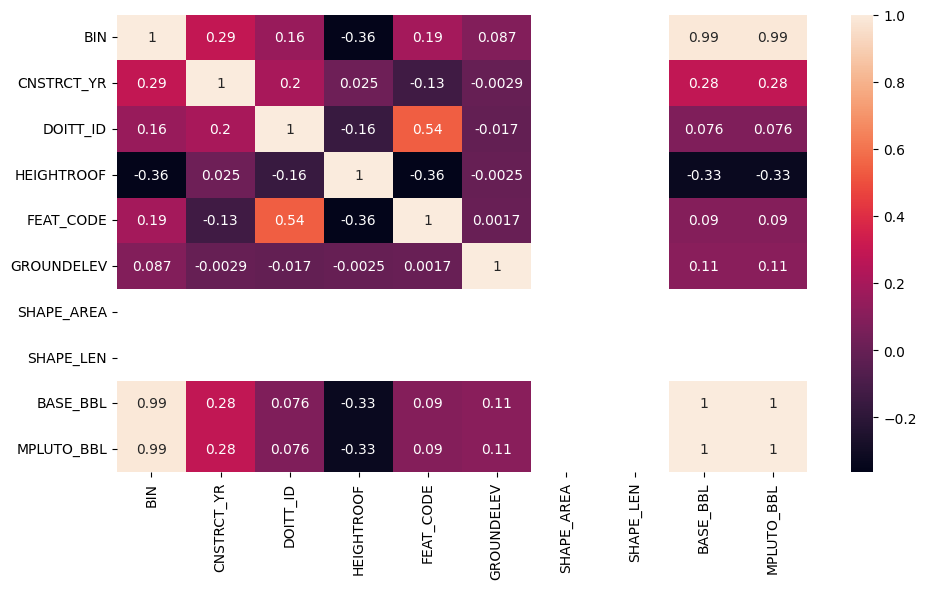

In [85]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    ax=ax
)

plt.tight_layout()

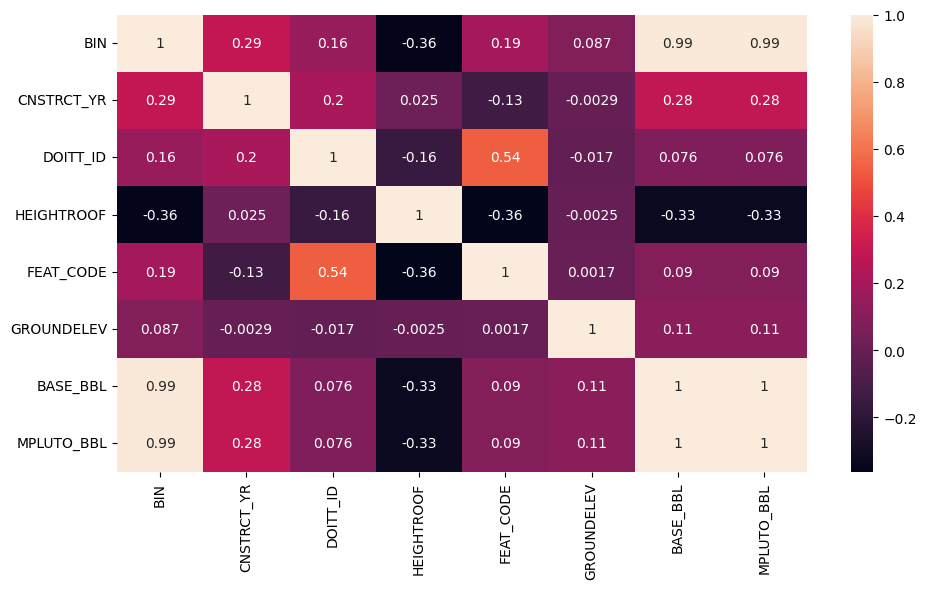

In [87]:
# correlation in the form of heat map
fig, ax = plt.subplots(figsize=(10, 6))

# dropping columns of all nulls
corr_df = numeric_df.drop(columns=['SHAPE_AREA', 'SHAPE_LEN'])

sns.heatmap(
    corr_df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## 3.3 Identifying Null Values

In [88]:
# total nulls in dataframe
null_count = (
    building_df
    .isnull()
    .sum()
    .sum()
)

print('total nulls in dataframe: {:,}'.format(null_count))

total nulls in dataframe: 1,095,541


In [89]:
# total non-nulls in dataframe
nonnull_count = (
    building_df
    .notnull()
    .sum()
    .sum()
)

print('total non-nulls in dataframe: {:,}'.format(nonnull_count))

total non-nulls in dataframe: 16,241,691


In [90]:
# nulls per column sorted descending
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

NAME          1081323
CNSTRCT_YR      10370
HEIGHTROOF       2649
GROUNDELEV        564
LSTSTATYPE        319
GEOMSOURCE        316
the_geom            0
BIN                 0
LSTMODDATE          0
DOITT_ID            0
FEAT_CODE           0
SHAPE_AREA          0
SHAPE_LEN           0
BASE_BBL            0
MPLUTO_BBL          0
GLOBALID            0
dtype: int64

In [91]:
# calculating a percentage of the number of nulls to total number of records of each column
(building_df
 .isnull()
 .sum()
 .sort_values(ascending=False)
 / len(building_df) * 100
)

NAME          99.791985
CNSTRCT_YR     0.957016
HEIGHTROOF     0.244468
GROUNDELEV     0.052050
LSTSTATYPE     0.029440
GEOMSOURCE     0.029163
the_geom       0.000000
BIN            0.000000
LSTMODDATE     0.000000
DOITT_ID       0.000000
FEAT_CODE      0.000000
SHAPE_AREA     0.000000
SHAPE_LEN      0.000000
BASE_BBL       0.000000
MPLUTO_BBL     0.000000
GLOBALID       0.000000
dtype: float64

In [92]:
# % null as a dataframe
missing_data = (building_df.isnull().sum() / len(building_df)) * 100

# creating a dataframe
(pd.DataFrame(
    missing_data, columns=['perc_missing'])
 .sort_values(by='perc_missing', ascending=False)
)

,perc_missing
NAME,99.791985
CNSTRCT_YR,0.957016
HEIGHTROOF,0.244468
GROUNDELEV,0.052050
LSTSTATYPE,0.029440
GEOMSOURCE,0.029163
the_geom,0.000000
BIN,0.000000
LSTMODDATE,0.000000
DOITT_ID,0.000000


In [93]:
# return a boolean same-sized object of nulls
building_df.isnull()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083572,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083573,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1083574,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1083575,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
# return a boolean if any of the values are null in column
(building_df
 .isnull()
 .any()
)

the_geom      False
NAME           True
BIN           False
CNSTRCT_YR     True
LSTMODDATE    False
LSTSTATYPE     True
DOITT_ID      False
HEIGHTROOF     True
FEAT_CODE     False
GROUNDELEV     True
SHAPE_AREA    False
SHAPE_LEN     False
BASE_BBL      False
MPLUTO_BBL    False
GEOMSOURCE     True
GLOBALID      False
dtype: bool

In [95]:
# return a boolean same-sized object of nulls in NAME column
building_df['NAME'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1083572    False
1083573    False
1083574    False
1083575    False
1083576    False
Name: NAME, Length: 1083577, dtype: bool

In [96]:
# returning rows with non-null values in NAME column
building_df.loc[building_df['NAME'].notnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
3579,MULTIPOLYGON (((-73.95317216502298 40.75924424...,Roosevelt Isld Subway Station,1089270,1975.0,03/25/2008 12:00:00 AM,Constructed,996736,28.470000,2100,16.0,0,0,1013730001,1013730001,Photogramm,{E49130B9-6088-4BB5-9BA5-ABA8BFC69BA7}
4311,MULTIPOLYGON (((-73.88526375915657 40.86258229...,Alpha House,2102033,1922.0,08/17/2017 12:00:00 AM,Constructed,194515,22.560000,5110,98.0,0,0,2032730001,2032730001,Photogramm,{8A21945E-76A9-47A7-9355-2D500A91A949}
5794,MULTIPOLYGON (((-73.88149603905721 40.84855265...,Pheasant Aviary,2123889,1905.0,07/17/2014 12:00:00 AM,Constructed,925752,22.075648,2100,70.0,0,0,2031200020,2031200020,Photogramm,{2BCDE23D-4DD7-4642-8FC1-B347EDE772CA}
7989,MULTIPOLYGON (((-73.8312596282937 40.871147879...,Asch Loop Town Houses,2128807,1969.0,08/22/2017 12:00:00 AM,Constructed,197782,26.450000,2100,18.0,0,0,2051410120,2051410120,Photogramm,{E7006798-10CF-49AA-BE4E-A1039405D38A}
8144,MULTIPOLYGON (((-73.90110014758918 40.73308422...,NO NAME,4597316,1940.0,08/17/2017 12:00:00 AM,Constructed,786648,11.000000,5110,68.0,0,0,4023750180,4023750180,Other (Man,{E2CADF8E-D955-4BD4-AEED-0EFC3A2149C4}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082256,MULTIPOLYGON (((-73.91937553610964 40.80888217...,Saw Mill Playground Public Restroom,2127605,2020.0,03/07/2024 12:00:00 AM,Constructed,1299152,13.000000,2100,18.0,0,0,2022840034,2022840034,Photogramm,{BDFD1C55-3008-455C-892E-329007533B3E}
1082259,MULTIPOLYGON (((-73.87891131955934 40.84886042...,Butterfly Garden,2130397,1905.0,03/07/2024 12:00:00 AM,Constructed,1067056,20.000000,2100,83.0,0,0,2031200020,2031200020,Other (Man,{C9381E72-DE9A-416F-BE57-F3ACAD8F4255}
1082450,MULTIPOLYGON (((-73.99870373163134 40.76079134...,SILVER TOWERS SOUTH,1085962,2005.0,03/12/2024 12:00:00 AM,Merged,1114380,673.000000,2100,-6.0,0,0,1010890003,1010897502,Other (Man,{6377C3D4-4110-45EA-B1D7-9F900EBA6B7F}
1082451,MULTIPOLYGON (((-73.99903732069352 40.76046928...,SILVER TOWERS NORTH,1087678,2005.0,03/12/2024 12:00:00 AM,Constructed,1106099,143.000000,2100,-5.0,0,0,1010890003,1010897502,Other (Man,{E9EC4B62-D228-4ADF-81EC-7751E49C3131}


In [97]:
# returning rows with null values in NAME column
building_df.loc[building_df['NAME'].isnull()]

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083572,MULTIPOLYGON (((-74.08706292133714 40.62914195...,NaN,5157675,2020.0,03/29/2024 12:00:00 AM,Constructed,1301770,10.000000,5110,274.0,0,0,5005870150,5005870150,Other (Man,{286A461E-938E-4D3D-BE23-CEB1146F7404}
1083573,MULTIPOLYGON (((-74.14445666373078 40.53864725...,NaN,5171559,2022.0,03/29/2024 12:00:00 AM,Constructed,1301771,26.000000,2100,7.0,0,0,5053060070,5053060070,Other (Man,{ED9670B0-F4A3-4DFB-B0F5-D437D7DC2603}
1083574,MULTIPOLYGON (((-74.1447187312683 40.538494680...,NaN,5174467,2023.0,03/29/2024 12:00:00 AM,NaN,1301772,10.000000,5110,6.0,0,0,5053060070,5053060070,Other (Man,{12525865-8136-4FD2-99E7-ABA36140B68F}
1083575,MULTIPOLYGON (((-74.14473245567532 40.53852591...,NaN,5172172,2021.0,03/29/2024 12:00:00 AM,Constructed,1301773,10.000000,5110,6.0,0,0,5053060069,5053060069,Other (Man,{5C20F608-FEAF-449B-BC1C-FCA76C8732C1}


# 4. Data Cleaning & Wrangling

We will be cleaning the **Construction Year** (i.e. CNSTRCT_YR) column, as this is the column we will be using in our analysis.

## Attribute Information for CNSTRCT_YR:
---------------------------------------------
| Attribute | Description | Field Type | Sensitive Field (Y/N) | Notes| 
|------------ | ------------- | -------- | ----------- | ----------|
| CNSTRCT_YR | The year construction of the building was completed. <br>Originally this column was populated using the Department of Finance Real Property Assessment Database (RPAD). Beginning in 2017 this will be the first year the completed structure is visible in available orthoimagery. Records where this is zero or NULL mean that this information was not available. | double | No

## 4.1 Previewing Column Values

In [98]:
# returning a series of the 'CNSTRCT_YR' column
building_df["CNSTRCT_YR"]

0          1925.0
1          1965.0
2          1970.0
3          1928.0
4          1950.0
            ...  
1083572    2020.0
1083573    2022.0
1083574    2023.0
1083575    2021.0
1083576    2022.0
Name: CNSTRCT_YR, Length: 1083577, dtype: float64

In [99]:
# returning a dataframe of the 'CNSTRCT_YR' column double brackets with .loc method
building_df.loc[:, ["CNSTRCT_YR"]]

,CNSTRCT_YR
0,1925.0
1,1965.0
2,1970.0
3,1928.0
4,1950.0
...,...
1083572,2020.0
1083573,2022.0
1083574,2023.0
1083575,2021.0


In [100]:
# first five rows sorted by the 'CNSTRCT_YR' column in ascending order
building_df.sort_values('CNSTRCT_YR').head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956554,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.540000,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
431363,MULTIPOLYGON (((-73.82449114078894 40.76279389...,NaN,4610542,1661.0,08/17/2017 12:00:00 AM,Constructed,1190137,14.846959,5110,63.0,0,0,4050130006,4050130006,Photogramm,{36678A28-E8EE-45E8-BAA2-9A3F5118E176}
711128,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.120000,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52898,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.640000,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
522153,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.260000,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}


In [101]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
building_df.sort_values('CNSTRCT_YR', ascending=False).head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
1083547,MULTIPOLYGON (((-73.96619500757286 40.59354764...,NaN,3429720,2024.0,03/28/2024 12:00:00 AM,Constructed,1301752,32.0,2100,11.0,0,0,3071560040,3071560040,Other (Man,{797BCB8A-8A4D-4AEB-970D-77CBD73D9AC6}
1082828,MULTIPOLYGON (((-73.81865291643454 40.78054826...,NaN,4624549,2024.0,02/27/2024 12:00:00 AM,Constructed,1301524,10.0,5100,67.0,0,0,4046550009,4046550009,Other (Man,{A21E2055-3C73-45F8-9512-B2F1C9A9C422}
1082830,MULTIPOLYGON (((-73.8186384224519 40.780468595...,NaN,4624548,2024.0,02/27/2024 12:00:00 AM,Constructed,1301522,25.0,5100,66.0,0,0,4046550009,4046550009,Other (Man,{11D17A32-5508-48EC-9FB2-3C1DD1D68AE1}
1083268,MULTIPOLYGON (((-73.80418130510829 40.78316567...,NaN,4623685,2024.0,03/26/2024 12:00:00 AM,NaN,1301747,30.0,2100,61.0,0,0,4047460026,4047460026,Other (Man,{F338DB3E-DE6C-4488-86E1-CBEA1C9E86DB}
1081975,MULTIPOLYGON (((-73.81851970780033 40.78045894...,NaN,4620938,2024.0,03/04/2024 12:00:00 AM,Constructed,1301523,25.0,5100,66.0,0,0,4046550010,4046550010,Other (Man,{1BA94494-99A1-485A-9972-C33DC20AAA83}


In [102]:
# first five rows sorted by the 'CNSTRCT_YR' column in descending order
(building_df
 .sort_values('CNSTRCT_YR', ascending=False)
 .loc[:, ['CNSTRCT_YR']]
 .head()
)

,CNSTRCT_YR
1083547,2024.0
1082828,2024.0
1082830,2024.0
1083268,2024.0
1081975,2024.0


In [103]:
# descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset's distribution, excluding ``NaN`` values.

building_df['CNSTRCT_YR'].describe()

count    1.073207e+06
mean     1.939616e+03
std      2.945580e+01
min      1.652000e+03
25%      1.920000e+03
50%      1.930000e+03
75%      1.955000e+03
max      2.024000e+03
Name: CNSTRCT_YR, dtype: float64

## 4.2 Exploring Distribution of Values

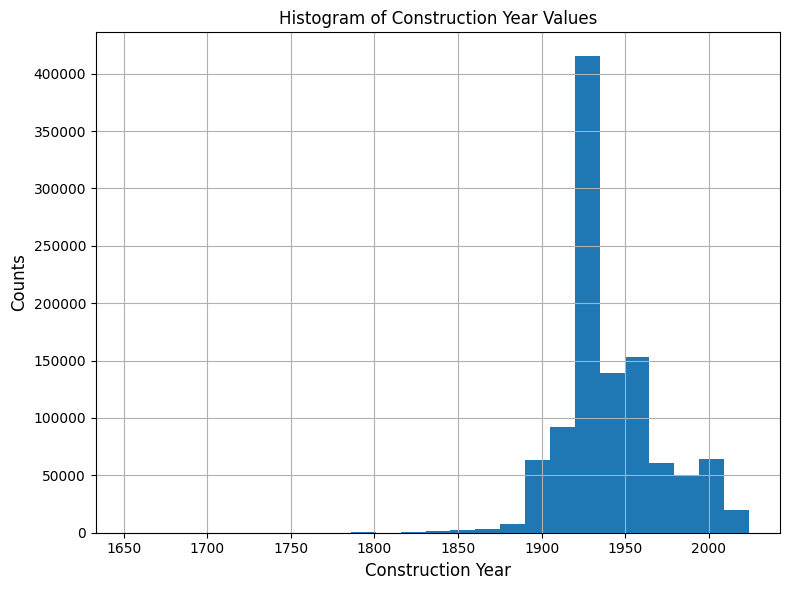

In [104]:
# making a histogram of our 'CNSTRCT_YR' column with 25 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=25
)

# adding labels
plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12) 
plt.title('Histogram of Construction Year Values', fontsize=12) 
plt.tight_layout()

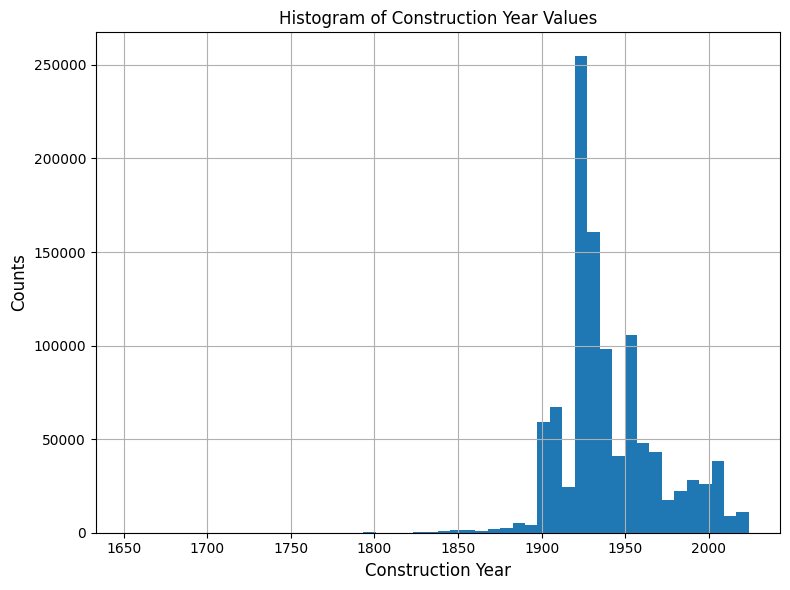

In [105]:
# making a histogram of our 'CNSTRCT_YR' column with 50 bins
fig, ax = plt.subplots(figsize=(8, 6))

building_df['CNSTRCT_YR'].hist(
    ax=ax,
    bins=50
)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Construction Year Values', fontsize=12)
plt.tight_layout()

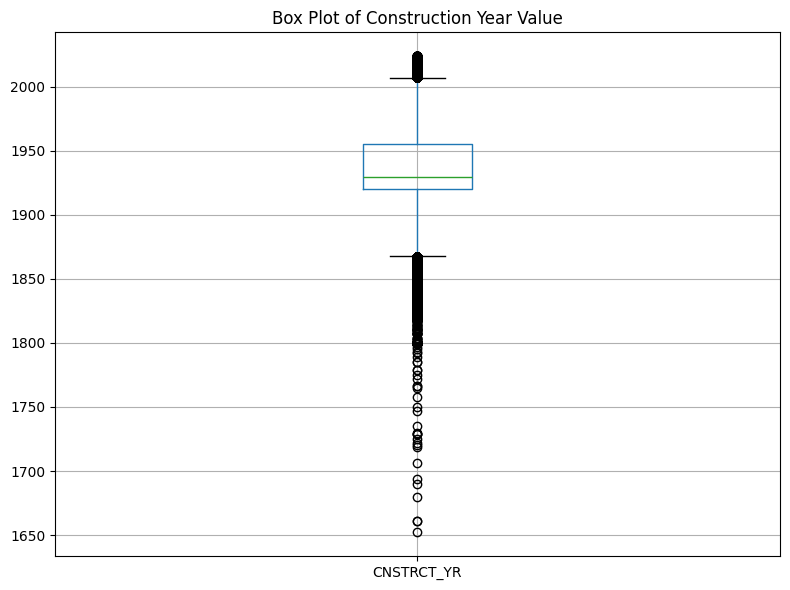

In [106]:
# making a box plot from our 'CNSTRCT_YR' column
fig, ax = plt.subplots(figsize=(8, 6))

building_df.boxplot(
    column=['CNSTRCT_YR'], 
    ax=ax
)

plt.title('Box Plot of Construction Year Value', fontsize=12)
plt.tight_layout()

## 4.3 Filtering Data

In [107]:
# df.iloc: Purely integer-location based indexing for selection by position.

# first row, first column
building_df.iloc[0, 0]

'MULTIPOLYGON (((-73.96664570466969 40.62599676998366, -73.96684846176461 40.625977490862574, -73.96685938726297 40.62604419372411, -73.96661621040211 40.62606731716107, -73.96660638332114 40.626007324369795, -73.96664680403327 40.626003480977275, -73.96664570466969 40.62599676998366)))'

In [108]:
# first row, start at second column return all columns
building_df.iloc[0, 1:]

NAME                                             NaN
BIN                                          3170958
CNSTRCT_YR                                    1925.0
LSTMODDATE                    08/22/2017 12:00:00 AM
LSTSTATYPE                               Constructed
DOITT_ID                                       96807
HEIGHTROOF                                 29.749853
FEAT_CODE                                       2100
GROUNDELEV                                      40.0
SHAPE_AREA                                         0
SHAPE_LEN                                          0
BASE_BBL                                  3065220021
MPLUTO_BBL                                3065220021
GEOMSOURCE                                Photogramm
GLOBALID      {31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
Name: 0, dtype: object

In [109]:
# first row, start at second column up to the last
building_df.iloc[0, 1:-1]

NAME                             NaN
BIN                          3170958
CNSTRCT_YR                    1925.0
LSTMODDATE    08/22/2017 12:00:00 AM
LSTSTATYPE               Constructed
DOITT_ID                       96807
HEIGHTROOF                 29.749853
FEAT_CODE                       2100
GROUNDELEV                      40.0
SHAPE_AREA                         0
SHAPE_LEN                          0
BASE_BBL                  3065220021
MPLUTO_BBL                3065220021
GEOMSOURCE                Photogramm
Name: 0, dtype: object

In [110]:
# specify row and column positions
building_df.iloc[[0, 5, 10], [0, 2, 5, 8]]

,the_geom,BIN,LSTSTATYPE,FEAT_CODE
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,3170958,Constructed,2100
5,MULTIPOLYGON (((-74.14644228489016 40.58885592...,5122427,Constructed,2100
10,MULTIPOLYGON (((-74.1344861688728 40.600563532...,5034441,Constructed,2100


In [111]:
# df.loc: Access a group of rows and columns by label(s) or a boolean array.

# locate rows where construction year > 2000
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [112]:
# locate construction year > 2000, columns 'BIN', 'CNSTRCT_YR'
(building_df
 .loc[building_df['CNSTRCT_YR'] > 2000, ['BIN', 'CNSTRCT_YR']]
 .head()
)

,BIN,CNSTRCT_YR
6,5133580,2001.0
50,3394646,2009.0
80,3072927,2003.0
98,3390096,2004.0
224,4555084,2004.0


In [113]:
# locate construction year greater than 2000 but less than 2020
(building_df
 .loc[(building_df['CNSTRCT_YR'] > 2000)
      & (building_df['CNSTRCT_YR'] < 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}
224,MULTIPOLYGON (((-73.70962745809653 40.73251740...,NaN,4555084,2004.0,08/17/2017 12:00:00 AM,Constructed,1227251,12.010000,5110,93.0,0,0,4088150039,4088150039,Photogramm,{BA42A1C4-FD8B-4FF9-B768-2644D66E0D7B}


In [114]:
# locate construction year between 2000 and 2020 inclusive
(building_df
 .loc[building_df['CNSTRCT_YR'].between(2000, 2020)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
6,MULTIPOLYGON (((-74.221228292902 40.5303177260...,NaN,5133580,2001.0,08/22/2017 12:00:00 AM,Constructed,937499,27.310000,2100,105.0,0,0,5073560090,5073560090,Photogramm,{57FDA52A-A7A6-4571-8B09-609930CE6308}
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.040000,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
50,MULTIPOLYGON (((-73.87129515296562 40.65717370...,NaN,3394646,2009.0,08/22/2017 12:00:00 AM,Constructed,1212853,21.608508,2100,18.0,0,0,3044520815,3044520815,Photogramm,{33E7F6CF-9E99-4317-A915-30ACA041102C}
80,MULTIPOLYGON (((-73.92554066446792 40.70095338...,NaN,3072927,2003.0,08/22/2017 12:00:00 AM,Constructed,986709,25.110000,2100,52.0,0,0,3032090105,3032090105,Photogramm,{12419B35-0CC1-4D78-B6C4-63B357ED71F5}
98,MULTIPOLYGON (((-73.94885443008951 40.69275708...,NaN,3390096,2004.0,08/22/2017 12:00:00 AM,Constructed,1049056,38.747306,2100,38.0,0,0,3017700054,3017700054,Photogramm,{A0589BC1-A408-4818-AADD-55772C4D2AAE}


In [115]:
# locate construction year value is in list
years = [2000, 2020]

(building_df
 .loc[building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
38,MULTIPOLYGON (((-74.15800726390819 40.62204540...,NaN,5129621,2000.0,08/22/2017 12:00:00 AM,Constructed,954205,30.04,2100,22.0,0,0,5016800094,5016800094,Photogramm,{B157C284-BD54-4819-B872-FF307A76B62B}
195,MULTIPOLYGON (((-74.13556237981483 40.64013483...,NaN,5132682,2000.0,08/22/2017 12:00:00 AM,Constructed,926272,29.08,2100,28.0,0,0,5010750122,5010750122,Photogramm,{6E88B8D1-E1FC-4421-BC53-42D3C4BCFE52}
451,MULTIPOLYGON (((-73.87150759130621 40.75533109...,NaN,4538129,2000.0,12/07/2018 12:00:00 AM,Constructed,1108486,38.00,2100,78.0,0,0,4017110040,4017110040,Other (Man,{E48501F8-F7F6-4B20-879D-20D8ED1F0DF3}
552,MULTIPOLYGON (((-74.0658246076789 40.592294919...,NaN,5132135,2000.0,12/07/2018 12:00:00 AM,Constructed,922090,31.00,2100,10.0,0,0,5031230005,5031230005,Other (Man,{D33FC432-28B1-4B87-A9FE-327923A7B9D1}
1268,MULTIPOLYGON (((-73.79809509137095 40.67312203...,NaN,4536134,2000.0,08/22/2017 12:00:00 AM,Constructed,960214,25.54,2100,32.0,0,0,4120600066,4120600066,Photogramm,{81BEA7A2-37AE-4BB3-8565-A43BCF9263C8}


In [116]:
# locate construction year value not in list
years = [2000, 2020]

(building_df
 .loc[~building_df['CNSTRCT_YR'].isin(years)]
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


## 4.4 Create New Columns

In [117]:
# create flag for buildings built after 2020, 1 (True) and 0 (False)
new_cols_df = building_df.copy()

new_cols_df.loc[new_cols_df['CNSTRCT_YR'] > 2020, ['after2020_flag']] = 1
new_cols_df['after2020_flag'] = new_cols_df['after2020_flag'].fillna(0)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0.0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0.0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0.0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0.0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0.0


In [118]:
# create new column rounding HEIGHTROOF
new_cols_df['HEIGHTROOF_round'] = new_cols_df['HEIGHTROOF'].round(0)

new_cols_df.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID,after2020_flag,HEIGHTROOF_round
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F},0.0,30.0
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520},0.0,23.0
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068},0.0,36.0
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF},0.0,38.0
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D},0.0,18.0


## 4.5 Filling In or Dropping Null Values for CNSTRCT_YR

In [119]:
nulls = building_df.isnull().sum().sum()
print('total nulls: {:,}'.format(nulls))

# dropping all records where 'CNSTRCT_YR' as null
nulls = (
    building_df
    .dropna(subset=['CNSTRCT_YR'])
    .isnull()
    .sum()
    .sum()
)

print('total nulls after dropping nulls in CNSTRCT_YR: {:,}'.format(nulls))

total nulls: 1,095,541
total nulls after dropping nulls in CNSTRCT_YR: 1,073,779


In [120]:
# saving a new dataframe to fill nans with the median value of 'CNSTRCT_YR'
building_df_fillna = building_df.copy()

counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 10,370


In [121]:
median = building_df_fillna['CNSTRCT_YR'].median()
print('median value of CNSTRCT_YR: {}'.format(median))

median value of CNSTRCT_YR: 1930.0


In [122]:
# saving the median of our 'CNSTRCT_YR' as the name 'median'
median = building_df_fillna['CNSTRCT_YR'].median()

# filling na values in our'CNSTRCT_YR' column with the column's median value
building_df_fillna["CNSTRCT_YR"] = building_df_fillna["CNSTRCT_YR"].fillna(value=median)
building_df_fillna.head()

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [123]:
counts = building_df_fillna['CNSTRCT_YR'].isnull().sum()
print('number of nulls for CNSTRCT_YR: {:,}'.format(counts))

number of nulls for CNSTRCT_YR: 0


# 5. Sample Analysis

## 5.1 Line Plot of Year Built

In [124]:
# returning number of buildings by year
year_df = (
    building_df
     .groupby('CNSTRCT_YR')[['DOITT_ID']]
     .count()
     .reset_index()
     .rename({'DOITT_ID': 'count'}, axis=1)
     .set_index('CNSTRCT_YR', drop=True)
)

year_df

,count
CNSTRCT_YR,
1652.0,1
1661.0,2
1680.0,1
1690.0,1
1694.0,1
...,...
2020.0,1594
2021.0,1453
2022.0,1526


In [125]:
# set index to int
year_df.index = year_df.index.astype(int)

year_df.head()

,count
CNSTRCT_YR,
1652,1
1661,2
1680,1
1690,1
1694,1


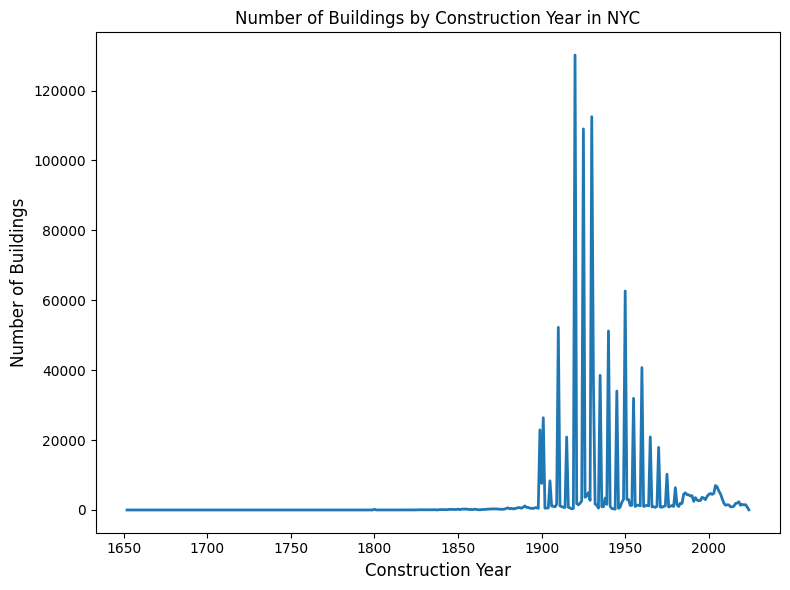

In [126]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['count'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)
plt.title('Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

In [127]:
# calculating the cumulative sum of buildings by 'CNSTRCT_YR'
year_df['cumsum'] = year_df['count'].cumsum()

# previewing first five rows
year_df.head()

,count,cumsum
CNSTRCT_YR,,
1652,1,1
1661,2,3
1680,1,4
1690,1,5
1694,1,6


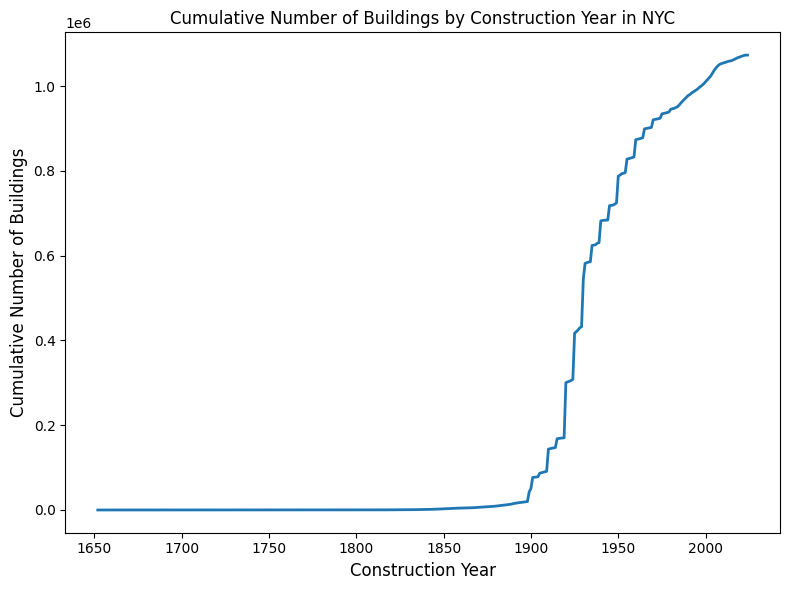

In [128]:
fig, ax = plt.subplots(figsize=(8, 6))

# plotting line chart of cumulative number of buildings by 'CNSTRCT_YR'
ax.plot(year_df['cumsum'], linewidth=2)

plt.xlabel('Construction Year', fontsize=12)
plt.ylabel('Cumulative Number of Buildings', fontsize=12)
plt.title('Cumulative Number of Buildings by Construction Year in NYC', fontsize=12)

plt.tight_layout()

## 5.2 Identify Oldest Building in Dataset

In [129]:
# sorting by the 'CNSTRCT_YR' in ascending order and 
# dropping records that don't have a building name (i.e. NAME)

(building_df
 .sort_values(by='CNSTRCT_YR')
 .dropna(subset=['NAME'])
 .head()
)

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956554,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}
711128,MULTIPOLYGON (((-73.8247828135812 40.762948467...,Bowne House,4113403,1661.0,08/22/2017 12:00:00 AM,Constructed,776399,26.12,2100,64.0,0,0,4050130006,4050130006,Photogramm,{71A760A6-6D2F-48F8-8C93-C8B66071B868}
52898,MULTIPOLYGON (((-74.25311647359251 40.50309522...,Conference House,5087656,1680.0,04/13/2020 12:00:00 AM,Constructed,702698,38.64,2100,38.0,0,0,5078570090,5078570090,Photogramm,{CB13BCBA-9DF3-4455-9206-824FE91F2EDE}
522153,MULTIPOLYGON (((-74.06293248238293 40.61512359...,Alice Austen House Museum,5042188,1690.0,04/13/2020 12:00:00 AM,Alteration,806241,22.26,2100,21.0,0,0,5028300049,5028300049,Photogramm,{93B1CB7B-BE72-40DB-9B66-01E92DF4AE6E}
504351,MULTIPOLYGON (((-74.01121069434295 40.70334382...,Fraunces Tavern,1078965,1719.0,01/28/2020 12:00:00 AM,Constructed,299639,47.83,2100,7.0,0,0,1000070035,1000070035,Photogramm,{4B8DF813-9EAD-402A-81D9-58ECCB4ED502}


In [130]:
# identifying the oldest building with a building name in this dataset and
oldest = (
    building_df
    .sort_values(by='CNSTRCT_YR')
    .dropna(subset=['NAME'])
    .head(1)
)

oldest

,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
956554,MULTIPOLYGON (((-73.92083460429942 40.64439765...,Pieter Claesen Wyckoff House,3221967,1652.0,01/28/2020 12:00:00 AM,Constructed,550741,24.54,2100,14.0,0,0,3079170009,3079170009,Photogramm,{5CAA55A5-5C4F-4F2B-B738-EB17A488BD84}


### We will use the Pieter Claesen Wyckoff House as the oldest building in this dataset.

Screenshot of Pieter Claesen Wyckoff House from Wikipedia:

https://en.wikipedia.org/wiki/Wyckoff_House

![Pieter-Claesen-Wyckoff-House](images/Pieter-Claesen-Wyckoff-House.png)

# 6. Conclusion

In this notebook, we reviewed various ways to inspect, clean, wrangle, and detect outliers in your data.  Specifically, we focused on ways to inspect the shape (number of rows, columns) of your data, fill in or replace incorrect values with the median, and detect outliers with box plots. This step is crucial if you are interested in modeling or predicting future values. In Part III, we will focus on data visualization.